In [160]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [119]:
# Read the given file, and view some sample records

retail_data = pd.read_excel("Online_Retail.xlsx")

In [120]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [121]:
retail_data.shape

(541909, 8)

In [122]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [123]:
retail_data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [124]:
retail_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [125]:
# Calculate the proportion of non-missing values for each column
train_missing = retail_data.count() / len(retail_data)

# Convert the proportions to percentages and calculate the percentage of missing values for each column
train_missing = (1 - train_missing) * 100

# Sort the missing percentages in descending order and display the top 60 columns
train_missing.sort_values(ascending=False)


CustomerID     24.926694
Description     0.268311
InvoiceNo       0.000000
StockCode       0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
Country         0.000000
dtype: float64

In [126]:
#Drop rows with missing customerid
retail_data.dropna(subset=['CustomerID'], inplace =True)

In [127]:
retail_data.shape

(406829, 8)

In [128]:
retail_cd.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [129]:
retail_data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [130]:
#Change dtype of CustomerID to String
retail_data['CustomerID'] = retail_data['CustomerID'].astype(str)


In [132]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [133]:
#Description shows Quantity having negative values, which is not correct, hence need to correct it
retail_data['Quantity'] = retail_data['Quantity'].abs()
retail_data['Quantity']

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 406829, dtype: int64

In [136]:
# Check duplicates

total_duplicates = retail_data.duplicated().sum()
duplicate_rows = retail_data[retail_data.duplicated(keep=False)]
duplicate_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [137]:
# Delete duplicate rows

retail_unique = retail_data.drop_duplicates()

In [138]:
retail_unique.shape

(401604, 8)

In [139]:
retail_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


In [140]:
retail_unique.describe()

,Quantity,InvoiceDate,UnitPrice
count,401604.000000,401604,401604.000000
mean,13.542995,2011-07-10 12:08:23.848567552,3.474064
min,1.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,6.000000,2011-07-29 15:40:00,1.950000
75%,12.000000,2011-10-20 11:58:30,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,250.213145,NaN,69.764035


In [154]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x: 'ArrayLike | Sequence[ArrayLike]', bins: 'int | Sequence[float] | str | None' = None, range: 'tuple[float, float] | None' = None, density: 'bool' = False, weights: 'ArrayLike | None' = None, cumulative: 'bool | float' = False, bottom: 'ArrayLike | float | None' = None, histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar', align: "Literal['left', 'mid', 'right']" = 'mid', orientation: "Literal['vertical', 'horizontal']" = 'vertical', rwidth: 'float | None' = None, log: 'bool' = False, color: 'ColorType | Sequence[ColorType] | None' = None, label: 'str | Sequence[str] | None' = None, stacked: 'bool' = False, *, data=None, **kwargs) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
    Compute and plot a histogram.

    This method uses `numpy.histogram` to bin the data in *x* and count the
    number of values in each bin, then draws the distribution ei

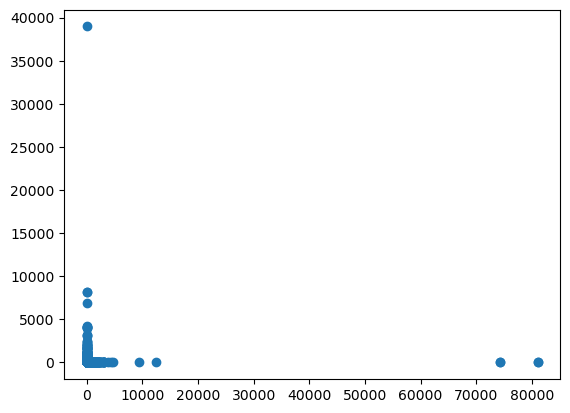

In [155]:
#Visualise the Data

plt.scatter(retail_unique['Quantity'], retail_unique['UnitPrice'])
plt.show()

In [157]:
correlation_matrix = retail_unique[['Quantity', 'UnitPrice']].corr()
correlation_matrix

,Quantity,UnitPrice
Quantity,1.000000,-0.001341
UnitPrice,-0.001341,1.000000


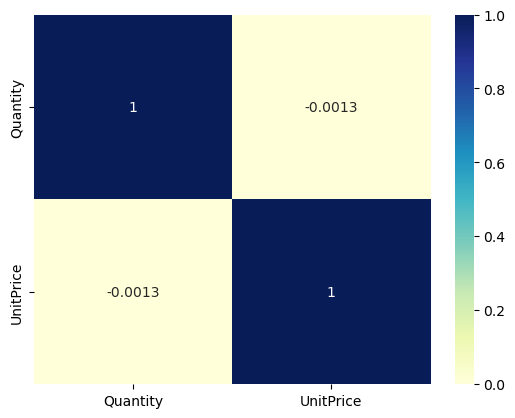

In [158]:
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot = True)
plt.show()

In [165]:
retail_unique.shape

(401604, 8)

In [166]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(retail_unique, train_size = 0.7, test_size = 0.3, random_state = 100)

In [168]:
df_train.shape

(281122, 8)

In [169]:
#Normalise the data

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data (select the columns you want to normalize)
num_vars = ['Quantity', 'UnitPrice']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
print(df_train[num_vars])

        Quantity  UnitPrice
441573  0.000284   0.000014
478735  0.000012   0.000042
262323  0.000284   0.000087
135283  0.000000   0.001283
84147   0.000062   0.000083
...          ...        ...
456175  0.000025   0.000255
350425  0.000136   0.000011
295996  0.000062   0.000218
88826   0.000136   0.000042
407969  0.000000   0.000054

[281122 rows x 2 columns]


In [170]:
df_train.describe()

,Quantity,InvoiceDate,UnitPrice
count,281122.000000,281122,281122.000000
mean,0.000160,2011-07-10 10:19:16.058935040,0.000089
min,0.000000,2010-12-01 08:26:00,0.000000
25%,0.000012,2011-04-07 09:35:00,0.000032
50%,0.000062,2011-07-29 12:41:00,0.000050
75%,0.000136,2011-10-20 11:03:00,0.000096
max,1.000000,2011-12-09 12:50:00,1.000000
std,0.003667,NaN,0.002042


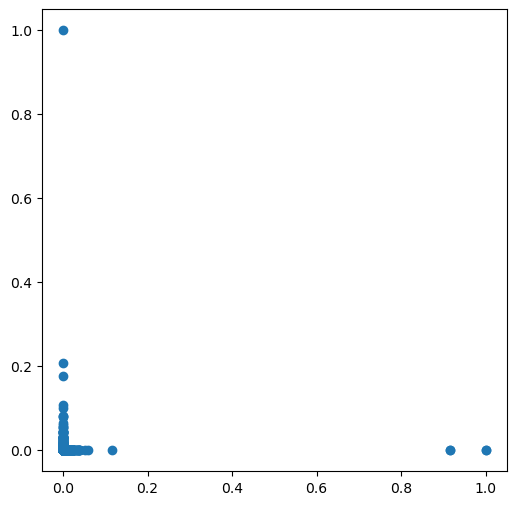

In [171]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.Quantity, df_train.UnitPrice)
plt.show()